<a href="https://colab.research.google.com/github/cxbxmxcx/TensorFlow_Certification/blob/master/TF_certification_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image classification with CIFAR-10


In [0]:
!pip install prettytensor

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Install TensorFlow
try:
  %tensorflow_version 2.x  
except Exception:
  pass

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf


Load and normalize data

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0 

170500096/170498071 [==============================] - 6s 0us/step


Add class names and inspect the raw data

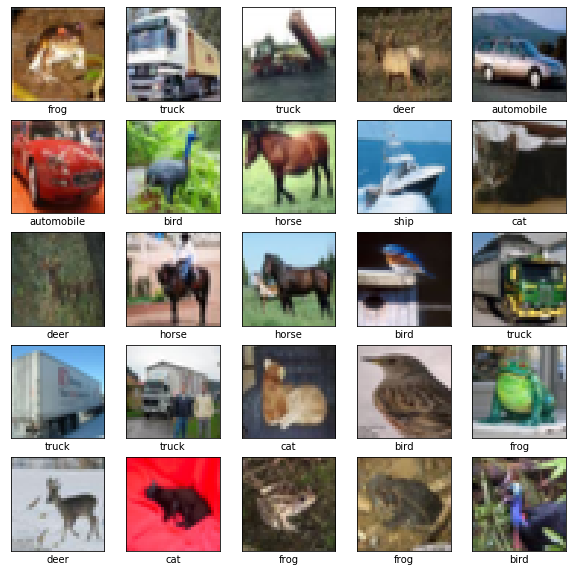

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Build the model

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Flatten the model

In [0]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

Compile, fit and capture training history

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.5168 - accuracy: 0.4440 - val_loss: 1.2637 - val_accuracy: 0.5413
Epoch 2/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.1616 - accuracy: 0.5873 - val_loss: 1.0771 - val_accuracy: 0.6167
Epoch 3/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 1.0164 - accuracy: 0.6420 - val_loss: 1.0513 - val_accuracy: 0.6301
Epoch 4/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.9176 - accuracy: 0.6789 - val_loss: 0.9670 - val_accuracy: 0.6614
Epoch 5/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.8396 - accuracy: 0.7068 - val_loss: 0.9242 - val_accuracy: 0.6802
Epoch 6/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.7815 - accuracy: 0.7257 - val_loss: 0.8618 - val_accuracy: 0.7037
Epoch 7/10
50000/50000 [==============================] 

Plot training/test history

10000/10000 - 4s - loss: 0.8841 - accuracy: 0.7050


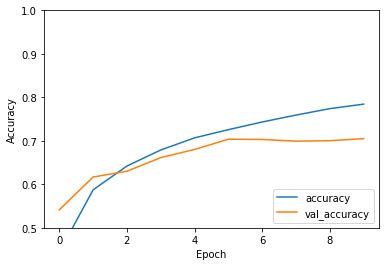

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) 